# 00 - Setup and Test

**Goal:** Verify everything is installed correctly and test the Pusher environment.

**Time:** 15-20 minutes

**What you'll learn:**
- How to import required libraries
- How to create the Pusher environment
- How to run a simple episode

---

## 1. Setup and Imports

In [2]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML, Image
import sys
import os

# Add src to path so we can import our modules
sys.path.append(os.path.abspath('../src'))

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✅ Standard libraries imported")

✅ Standard libraries imported


In [4]:
# PyTorch
import torch
import torch.nn as nn
import torch.optim as optim

print(f"✅ PyTorch {torch.__version__} imported")
print(f"   CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"   GPU: {torch.cuda.get_device_name(0)}")
else:
    print("   Using CPU (this is fine for now!)")

✅ PyTorch 2.8.0+cpu imported
   CUDA available: False
   Using CPU (this is fine for now!)


In [5]:
# Gymnasium and MuJoCo
import gymnasium as gym

print(f"✅ Gymnasium {gym.__version__} imported")
print("   Testing MuJoCo...")

try:
    test_env = gym.make("Pusher-v5")
    test_env.reset()
    test_env.close()
    print("   ✅ MuJoCo working! Pusher environment created successfully.")
except Exception as e:
    print(f"   ❌ Error: {e}")
    print("   Try: pip install gymnasium[mujoco]")

✅ Gymnasium 1.2.1 imported
   Testing MuJoCo...
   ✅ MuJoCo working! Pusher environment created successfully.


## 2. Create and Inspect Environment

In [7]:
# Create Pusher environment
env = gym.make("Pusher-v5")

print("📊 Environment Information:")
print("=" * 60)
print(f"Observation space: {env.observation_space}")
print(f"  Shape: {env.observation_space.shape}")
print(f"  Type: {env.observation_space.dtype}")
print()
print(f"Action space: {env.action_space}")
print(f"  Shape: {env.action_space.shape}")
print(f"  Range: [{env.action_space.low[0]:.1f}, {env.action_space.high[0]:.1f}]")
print("=" * 60)

📊 Environment Information:
Observation space: Box(-inf, inf, (23,), float64)
  Shape: (23,)
  Type: float64

Action space: Box(-2.0, 2.0, (7,), float32)
  Shape: (7,)
  Range: [-2.0, 2.0]


### Understanding the Spaces

**Observation Space (23 dimensions):**
- Indices 0-6: Joint positions
- Indices 7-13: Joint velocities  
- Indices 14-16: Fingertip position (x, y, z)
- Indices 17-19: Object position (x, y, z)
- Indices 20-22: Goal position (x, y, z)

**Action Space (7 dimensions):**
- Each value is a torque applied to one joint
- Range: [-2, 2] for each joint

## 3. Test a Single Episode

In [8]:
# Reset environment
obs, info = env.reset(seed=42)

print("🎬 Initial Observation:")
print(f"  Full observation shape: {obs.shape}")
print(f"  Fingertip position: {obs[14:17]}")
print(f"  Object position:    {obs[17:20]}")
print(f"  Goal position:      {obs[20:23]}")
print()

# Calculate initial distance
initial_distance = np.linalg.norm(obs[17:20] - obs[20:23])
print(f"  Initial distance (object → goal): {initial_distance:.4f}")

🎬 Initial Observation:
  Full observation shape: (23,)
  Fingertip position: [ 0.821 -0.6    0.   ]
  Object position:    [ 0.64024894 -0.3217468  -0.275     ]
  Goal position:      [ 0.45  -0.05  -0.323]

  Initial distance (object → goal): 0.3352


In [9]:
# Run one episode with random actions
print("🎲 Running episode with random actions...\n")

obs, _ = env.reset(seed=42)
total_reward = 0
distances = []

for step in range(50):  # 50 steps for quick test
    # Take random action
    action = env.action_space.sample()
    
    # Step environment
    obs, reward, terminated, truncated, info = env.step(action)
    
    total_reward += reward
    
    # Track distance
    distance = np.linalg.norm(obs[17:20] - obs[20:23])
    distances.append(distance)
    
    if step % 10 == 0:
        print(f"  Step {step:3d}: reward={reward:7.3f}, distance={distance:.4f}")
    
    if terminated or truncated:
        print(f"\n  Episode ended at step {step}")
        break

print(f"\n📈 Results:")
print(f"  Total reward: {total_reward:.2f}")
print(f"  Final distance: {distances[-1]:.4f}")
print(f"  Steps taken: {len(distances)}")

env.close()

🎲 Running episode with random actions...

  Step   0: reward= -1.703, distance=0.3352
  Step  10: reward= -1.383, distance=0.3352
  Step  20: reward= -1.234, distance=0.3352
  Step  30: reward= -1.687, distance=0.3352
  Step  40: reward= -1.316, distance=0.3352

📈 Results:
  Total reward: -73.63
  Final distance: 0.3352
  Steps taken: 50


## 4. Visualize Distance Over Time

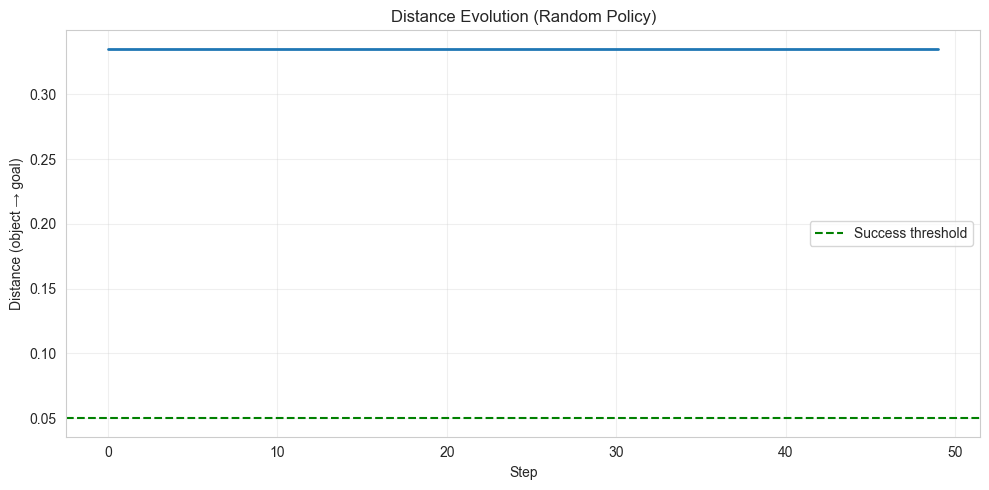

💾 Figure saved to results/figures/test_episode.png


In [10]:
# Plot how distance changed over the episode
plt.figure(figsize=(10, 5))
plt.plot(distances, linewidth=2)
plt.axhline(y=0.05, color='g', linestyle='--', label='Success threshold')
plt.xlabel('Step')
plt.ylabel('Distance (object → goal)')
plt.title('Distance Evolution (Random Policy)')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('../results/figures/test_episode.png', dpi=150, bbox_inches='tight')
plt.show()

print("💾 Figure saved to results/figures/test_episode.png")

## 5. Quick Statistics

In [11]:
# Run 10 quick episodes to get baseline stats
print("🔬 Running 10 random episodes for baseline statistics...\n")

env = gym.make("Pusher-v5")
episode_rewards = []
episode_distances = []

for episode in range(10):
    obs, _ = env.reset()
    total_reward = 0
    
    for step in range(100):
        action = env.action_space.sample()
        obs, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        
        if terminated or truncated:
            break
    
    final_distance = np.linalg.norm(obs[17:20] - obs[20:23])
    episode_rewards.append(total_reward)
    episode_distances.append(final_distance)
    
    print(f"  Episode {episode+1:2d}: reward={total_reward:7.2f}, distance={final_distance:.4f}")

env.close()

print("\n📊 Random Policy Baseline:")
print(f"  Average reward:   {np.mean(episode_rewards):7.2f} ± {np.std(episode_rewards):.2f}")
print(f"  Average distance: {np.mean(episode_distances):.4f} ± {np.std(episode_distances):.4f}")
print(f"  Success rate:     {sum(d < 0.05 for d in episode_distances)}/10")

🔬 Running 10 random episodes for baseline statistics...

  Episode  1: reward=-165.84, distance=0.2554
  Episode  2: reward=-150.05, distance=0.2531
  Episode  3: reward=-131.62, distance=0.2474
  Episode  4: reward=-150.15, distance=0.2682
  Episode  5: reward=-160.18, distance=0.1987
  Episode  6: reward=-151.05, distance=0.2919
  Episode  7: reward=-149.99, distance=0.2232
  Episode  8: reward=-162.73, distance=0.3293
  Episode  9: reward=-153.03, distance=0.2953
  Episode 10: reward=-164.47, distance=0.3573

📊 Random Policy Baseline:
  Average reward:   -153.91 ± 9.60
  Average distance: 0.2720 ± 0.0453
  Success rate:     0/10


## 6. Summary and Next Steps

### ✅ What We Verified

1. All libraries installed correctly
2. Pusher environment works
3. We can run episodes and collect data
4. Random policy performs poorly (as expected!)

### 📝 Key Observations

Write your observations here:
- Random policy success rate: 0/10
- Average distance achieved: 0.2720 ± 0.0453
- Typical reward: -153.91 ± 9.60
- What did you notice about the robot's behavior?

### 🎯 Next Steps

1. Open `01_environment_exploration.ipynb`
2. Deep dive into understanding the environment
3. Learn what each observation and action means

---

**Ready to continue? Open the next notebook!** 🚀